# Introduction to Linear Regression

In this chapter, we introduce regression analysis and some of its application in financial data. Regression is related to how to make prediction about real-world quantities. How does sales volumes change with the change of sales price? how does stock price change with change of hot tpoics in social media? 

All these questions have a common structure: they ask for a response that can be expressed as a combination of one or more (independent) variables (also called covariates, features or predictors). The role of regression is to build a model to predict the response from the variables. This process involves the transition from data to model. 

More specially, the model can be useful in different tasks, such as the following:

- analyzing the behavior of data (the relation between the response and the predictors).
- predicting data values (whether continuous or discrete).
- finding important variables (features) for the model

In order to understand how a regression model can suitable for tackling these tasks, we will motivate simple linear regression and multiple linear regression with two practical cases. 

# Simple Linear Regression

## Data and Questions

The first dataset contains house sale prices for King County. It includes homes sold between May 2014 and May 2015 and is a great dataset for evaluating simple regression models. Please check [kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction) for details.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
kc_data=pd.DataFrame.from_csv('kc_house_data.csv',index_col=0)
print(kc_data.shape)
print(kc_data.head())

AttributeError: type object 'DataFrame' has no attribute 'from_csv'

Totally we have 21613 sales records and each record has 20 features excluding sale ID.  We first explore the data a bit using scatterplot matrix

### Question 1: Predict price from sqft_living:

Suppose this is a question on kaggla with 1M as bonus, how to run this competition fairly? Ideally, the kaggle will still have another set of data from the same population. When the competitor reports a model, they can test their model on the new data. 

In order to have a consistent model, in other words, we expect the model to perform at the similar level in different datasets from the same population, we separate our kc_data into two parts with ration 80% and 20% roughly. The first part is called trainning data and the second is called testing data. We use trainning data to build model and the testing data to evaluate real performance. If the performance of the model in trainning data is very good but poor in the testing data, we say that the model is **overfitted**




In [2]:
train_kc=kc_data.loc[kc_data.index[:-4000]]
test_kc=kc_data.loc[kc_data.index[-4000:]]

More strictly, we should shuffle the rows before we do this separation. 

In [3]:
from sklearn.utils import shuffle
shuffled_kc=shuffle(kc_data)
print(shuffled_kc.head())

                       date     price  bedrooms  bathrooms  sqft_living  \
id                                                                        
6892510200  20140602T000000  290000.0         3       2.50         2080   
2597550090  20140905T000000  455000.0         5       2.25         3470   
2475200290  20141020T000000  332544.0         2       1.75         1710   
323089005   20150326T000000  240000.0         2       1.00         1120   
293610040   20150210T000000  600000.0         4       2.75         2950   

            sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
id                                                                             
6892510200      4828     2.0           0     0          3      8        2080   
2597550090     28212     1.5           0     0          4      8        2790   
2475200290      4187     1.0           0     0          3      7        1710   
323089005      45302     1.0           0     2          4      5        11

   and then separate the shuffled_kc into two parts

In [4]:
train_kc=kc_data.loc[shuffled_kc.index[:-4000]]
test_kc=kc_data.loc[shuffled_kc.index[-4000:]]

### Question 2: Predict price from bedrooms:
The second quesiton is to predict the price based on the number of bedrooms and will build and evaluate these two models in the next section. 

## Build Model


Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x+\epsilon$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x
- $\epsilon$ is noise.

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict price!

Before we run the regrssion model, we need to take look the scatterplot between response and predictors

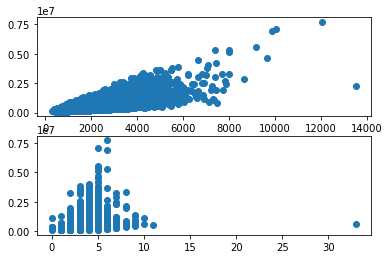

In [5]:
plt.subplot(2,1,1)
plt.scatter(train_kc['sqft_living'],train_kc['price'])
plt.subplot(2,1,2)
plt.scatter(train_kc['bedrooms'],train_kc['price'])

From scatterplots, sqft_living and price has stronger linear pattten. Next we will use package from statsmodels to run linear regression.  

In [6]:
train_kc['sqft_living'].values
train_kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
6892510200,20140602T000000,290000.0,3,2.50,2080,4828,2.0,0,0,3,8,2080,0,2002,0,98042,47.3737,-122.132,2190,4620
2597550090,20140905T000000,455000.0,5,2.25,3470,28212,1.5,0,0,4,8,2790,680,1978,0,98042,47.3342,-122.108,2020,28177
2475200290,20141020T000000,332544.0,2,1.75,1710,4187,1.0,0,0,3,7,1710,0,1987,0,98055,47.4732,-122.188,1760,4084
323089005,20150326T000000,240000.0,2,1.00,1120,45302,1.0,0,2,4,5,1120,0,1932,0,98045,47.5105,-121.770,2150,101930
293610040,20150210T000000,600000.0,4,2.75,2950,5803,2.0,0,0,3,9,2950,0,2007,0,98028,47.7368,-122.231,2940,5803


In [38]:
import statsmodels.formula.api as smf
godmodel = smf.ols(formula='price~sqft_living', data=train_kc).fit()  #have multiple: name+name...
#ordinary lease square
godmodel.summary()


#data of b0 and b1 is different for every shuffle

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.741e+04
Date:                Wed, 25 Oct 2017   Prob (F-statistic):               0.00
Time:                        10:10:22   Log-Likelihood:            -2.4873e+05
No. Observations:               17909   AIC:                         4.975e+05
Df Residuals:                   17907   BIC:                         4.975e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.354e+04   4806.960     -9.058      0.000    -5.3e+04   -3.41e+04
sqft_living   280.4825      2.126    131.930      0.000     276.315     284.650
==============================================================================
Omnibus:                    12796.552   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           548737.449
Skew:                           2.948   Prob(JB):                         0.00
Kurtosis:                      29.469   Cond. No.                     5.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
print("b0=", godmodel.params[0])
print ( "b1=", godmodel.params[1])
print(type(train_kc['sqft_living']))

b0= -43541.7190407
b1= 280.482450406
<class 'pandas.core.series.Series'>


We can cumpute estimated average price using 
$$
\mu_Y=\beta_0+\beta_1X
$$

In [9]:
train_kc['Estimated_AveragePrice']=godmodel.params[0]+godmodel.params[1]*train_kc['sqft_living']

/Users/sze/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


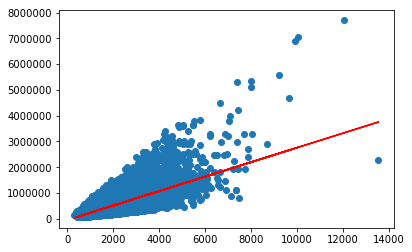

In [10]:
plt.scatter(train_kc['sqft_living'],train_kc['price'])
plt.plot(train_kc['sqft_living'],train_kc['Estimated_AveragePrice'],'r')  #plot: connect into straight regression line
#without plot: might have disconnect points in the line, base on the concentration of the data

model and parameters are stored in godmodel. We can give our prediction based on the predictor using this model

/Users/sze/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


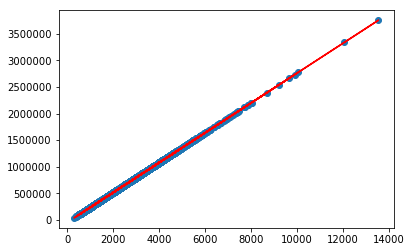

In [11]:
train_kc['Predicted_price']=godmodel.predict(train_kc)  
# predict: minimize the predict value and regression line, so the point of predict value is on the line 
plt.scatter(train_kc['sqft_living'],train_kc['Predicted_price'])
plt.plot(train_kc['sqft_living'],train_kc['Estimated_AveragePrice'],'r')

In the linear regression, we use $y$ to stands the real value and $\hat{y}$ to represents predicted values. The average of response estimated is also called predicted value for response.  

### Prediction Equation (Least square)

$$\hat{y}=b_0+b_1x$$

- $\hat{y}$: predicted value
- $b_0$:estimated value of $\beta_0$
- $b_1$:estimated value of $\beta_1$

## Evaluating and Selecting Models 

Linear regression models is to minimizing the difference between real and predicted values of response, or mathematically,   **sum of squared residuals** (or "sum of squared errors", **SSE**):
$$
SSE=\sum_{i=1}^n(y_i-\hat{y}_i)^2
$$

In [12]:
train_sse=((train_kc['price']-train_kc['Predicted_price'])**2).sum()
print(train_sse)
#measure the different between actual price and the model

1213153497971271.8


It is hard to say whether it is big  or not. We have two alternative measures. First, we need to computer total sum of square of deviation of response (SST)
$$
SST=\sum_{i=1}^n(y_i-\bar{y})^2
$$


In [13]:
train_sst=((train_kc['price']-train_kc['price'].mean())**2).sum()
#measure the change of y
# SSR is the response that can be explained by the model
train_sst

2392325749507407.0

SSE is the part of total variation of response (SST) that cannot be supported (explained) by the model. Hence  $$SST-SSE$$ is the part of variation of response that is explained by the model. We give a name: SSR (Sum of squares of regression):
$$
SSR=SST-SSE
$$
then we can derivate the first measure $R^2$:
$$
R^2=\frac{SSR}{SST}
$$
which is the percentage of variation of response that can be interpreted by the model. 

In [14]:
train_r2=(train_sst-train_sse)/train_sst
print(train_r2)

0.49289786383770406


It means that more than 48% of variation  of response is explained by the model.

Another measure is called standard error of estimation (s) or rmse (root of mean square of error):
$$
s=\sqrt{\frac{SSE}{n-k-1}}
$$
n is the sample size, and k is number of predictors, which normalize the SSE so that it can be applied to evaluate models across different dataset.

In [15]:
train_s=(train_sse/(train_kc.shape[0]-2))**0.5
print(train_s)

260283.3936690846


First we will evaluate models by checking performance of the model in training and testing datasets. 

In [16]:
Performance_table=pd.DataFrame(index=['R^2', 's'],columns=['train','test'])
Performance_table['train']=[train_r2,train_s]

Performance_table

,train,test
R^2,0.492898,NaN
s,260283.393669,NaN


In [17]:
predicted_price_test=godmodel.predict(test_kc)
test_sse=((test_kc['price']-predicted_price_test)**2).sum()
test_sst=((test_kc['price']-test_kc['price'].mean())**2).sum()
test_r2=(test_sst-test_sse)/test_sst
test_s=(test_sse/(test_kc.shape[0]-2))**0.5

In [18]:
Performance_table['test']=[test_r2,test_s]
Performance_table

,train,test
R^2,0.492898,0.497399
s,260283.393669,262512.542642


The performance of this model is very consistent in different dataset which explain more 48% variation of response. 

Next we are building another model for the second questions. 

In [19]:
roommodel = smf.ols(formula='price~bedrooms', data=train_kc).fit()
print("b0=", godmodel.params[0])
print ( "b1=", godmodel.params[1])


b0= -43541.7190407
b1= 280.482450406


/Users/sze/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


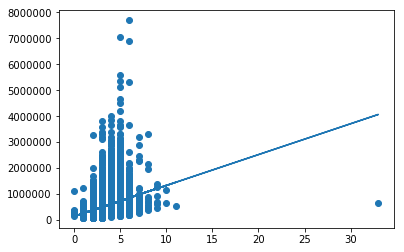

In [20]:
plt.scatter(train_kc['bedrooms'],train_kc['price'])  #no line, only dots
train_kc['Predicted_price_room']=roommodel.predict(train_kc)
plt.plot(train_kc['bedrooms'],train_kc['Predicted_price_room'])  #find a line connect all the dots

In [21]:
train_sse_room=((train_kc['price']-train_kc['Predicted_price_room'])**2).sum()
train_sst_room=((train_kc['price']-train_kc['price'].mean())**2).sum()
train_r2_room=(train_sst_room-train_sse_room)/train_sst_room
train_s_room=(train_sse_room/(train_kc.shape[0]-2))**0.5

for test dataset

In [22]:
predicted_price_test_room=roommodel.predict(test_kc)
test_sse_room=((test_kc['price']-predicted_price_test_room)**2).sum()
test_sst_room=((test_kc['price']-test_kc['price'].mean())**2).sum()
test_r2_room=(test_sst_room-test_sse_room)/test_sst
test_s_room=(test_sse_room/(test_kc.shape[0]-2))**0.5


In [23]:
Performance_table_room=pd.DataFrame([[train_r2_room,test_r2_room],[train_s_room,test_s_room]],index=['R^2', 's'],columns=['train','test'])

In [24]:
Performance_table_room
#want R^2 as high as possible (how fit the model), s (sd) as low as possible

,train,test
R^2,0.093135,0.098090
s,348072.765269,351657.794301


We can see that both models' performance are very consistent.  But the second model's $R^2$ is very low and standard error is high. Hence we will select the first model to predict prices instead the second models. This is so called **model selection**.

## Diagnostics of Regression Model

In [25]:
godmodel.summary(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.741e+04
Date:                Wed, 25 Oct 2017   Prob (F-statistic):               0.00
Time:                        10:10:10   Log-Likelihood:            -2.4873e+05
No. Observations:               17909   AIC:                         4.975e+05
Df Residuals:                   17907   BIC:                         4.975e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.354e+04   4806.960     -9.058      0.000    -5.3e+04   -3.41e+04
sqft_living   280.4825      2.126    131.930      0.000     276.315     284.650
==============================================================================
Omnibus:                    12796.552   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           548737.449
Skew:                           2.948   Prob(JB):                         0.00
Kurtosis:                      29.469   Cond. No.                     5.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
godmodel.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                 OLS               Adj. R-squared:      0.493      
Dependent Variable:    price             AIC:                 497459.0330
Date:                  2017-10-25 10:10  BIC:                 497474.6191
No. Observations:      17909             Log-Likelihood:      -2.4873e+05
Df Model:              1                 F-statistic:         1.741e+04  
Df Residuals:          17907             Prob (F-statistic):  0.00       
R-squared:             0.493             Scale:               6.7747e+10 
-------------------------------------------------------------------------
               Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
-------------------------------------------------------------------------
Intercept   -43541.7190 4806.9597  -9.0581 0.0000 -52963.8238 -34119.6143
sqft_living    280.4825    2.1260 131.9296 0.0000    276.3153    284.6496
-------------------------------------------------------------------------
Omnibus:               12796.552       Durbin-Watson:          1.988     
Prob(Omnibus):         0.000           Jarque-Bera (JB):       548737.449
Skew:                  2.948           Prob(JB):               0.000     
Kurtosis:              29.469          Condition No.:          5588      
=========================================================================
* The condition number is large (6e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

To apply the model statistically correct, we need to check four assumption about the errors. 

####  1.  Observed errors' means are nearly zero

In [27]:
error=train_kc['price']-train_kc['Predicted_price']

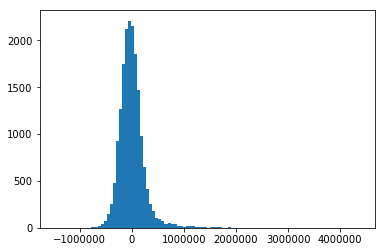

In [28]:
fig=plt.hist(error,bins=100)

###  2. Observed errors' variances are nearly equal

-  homoscedastic: similar variance 

-  heteroscedastic: different variance 

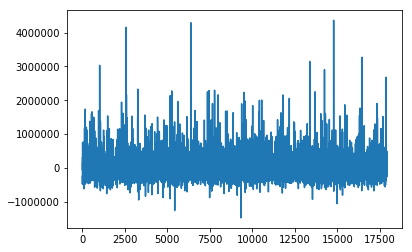

In [29]:
import numpy as np
plt.plot(np.arange(len(error)),error)

### 3. Observed errors are independent 

-  Durbin-Watson test
- $ D=\sum_{i=1}^n\frac{(\hat{\epsilon}_i-\hat{\epsilon}_{i-1})^2}{\hat{\epsilon}_i^2}\approx 2(1-r)$
- if $D<d_L$, there is  positive autocorrelation
- if $D>d_U$, there is  negative autocorrelation

[Durbin-Watson Significance Table](https://www3.nd.edu/~wevans1/econ30331/Durbin_Watson_tables.pdf)

In [30]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(error)

1.9878676848619519

In [31]:
godmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.741e+04
Date:                Wed, 25 Oct 2017   Prob (F-statistic):               0.00
Time:                        10:10:11   Log-Likelihood:            -2.4873e+05
No. Observations:               17909   AIC:                         4.975e+05
Df Residuals:                   17907   BIC:                         4.975e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.354e+04   4806.960     -9.058      0.000    -5.3e+04   -3.41e+04
sqft_living   280.4825      2.126    131.930      0.000     276.315     284.650
==============================================================================
Omnibus:                    12796.552   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           548737.449
Skew:                           2.948   Prob(JB):                         0.00
Kurtosis:                      29.469   Cond. No.                     5.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4. Observed  Errors  are roughly normal

- Q-Q plot

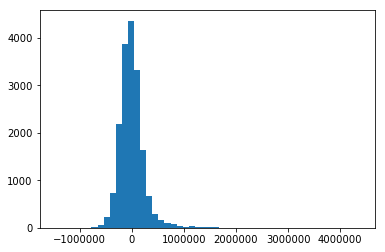

In [32]:
h=plt.hist(error, bins=50)

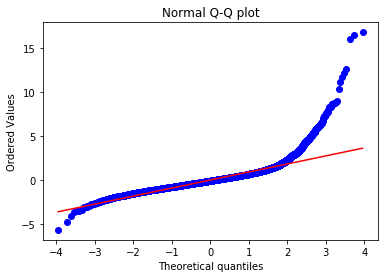

In [33]:
import scipy.stats as stats
import numpy as np
z = (error-np.mean(error))/np.std(error)

stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

#the four conditions can't meet (like falt tail in QQ plot), only matter confident interval: normal distribution/t-test/f-test; but can use R^2

In [34]:
train_kc['LogPrice']=np.log(train_kc['price'])
newmodel = smf.ols(formula='LogPrice~sqft_living', data=train_kc).fit()
train_kc['Predict']=newmodel.predict(train_kc)

/Users/sze/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/sze/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
newerror = train_kc['LogPrice']-train_kc['Predict']

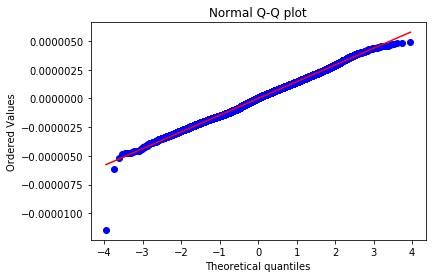

In [36]:
z = (newerror-np.mean(error))/np.std(error)

stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

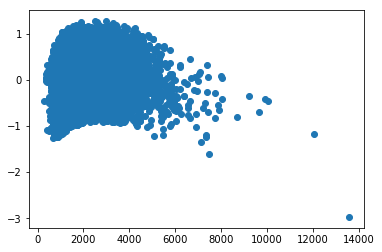

In [37]:
plt.scatter(train_kc['sqft_living'],newerror)